In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import visfunctions as sp
import utilfunctions as sf
import pickle
import warnings
warnings.filterwarnings('ignore')

In [24]:
def visualize_attention(CC_data, plotN=5, plottype=2, SIGMA=50):
    # plottype:
    # 1 for gaze locations only
    # 2 for heatmap overlay
    # 3 for regular spotlight
    # 4 for spotlight with level sets
    # SIGMA is used for converting locations into maps (distributions)
    # plotN is how many images to plot

    imnames = list(CC_data.keys())
    
    if plotN:
        imnames = imnames[:plotN] 

    for filename in imnames:

        code_heatmap,im = sf.get_heatmap_for_image(filename,CC_data[filename],imdir,sigma=SIGMA,toplot=False)

        fig, ax = plt.subplots(1, 1, figsize=(8,8))

        if plottype==1:
            ax.imshow(im)
            xs = [elem['coords'][0] for elem in CC_data[imnames[i]]]
            ys = [elem['coords'][1] for elem in CC_data[imnames[i]]]
            ax.scatter(x=xs, y=ys, c='r', s=10)
        elif plottype==2:
            sp.transparent_heatmap(ax,im,code_heatmap)
        elif plottype==3:
            spotlight_res = sp.spotlight(im,code_heatmap,toplot=False);
            ax.imshow(spotlight_res); 
        elif plottype==4:
            spotlight_res = sp.spotlight_custom(im,code_heatmap,toplot=False,percentile_based=False,levels=5,most_salient_nlevel=3,smoothness=0)
            ax.imshow(spotlight_res); 

        ax.set_axis_off(); ax.set_title(filename);

        plt.show();

# CAT2000: natural images #
Source: http://saliency.mit.edu/datasets.html

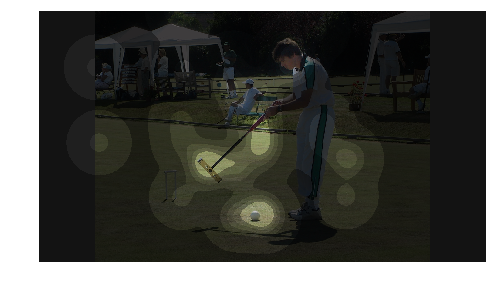

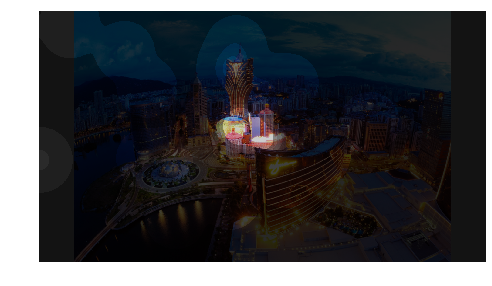

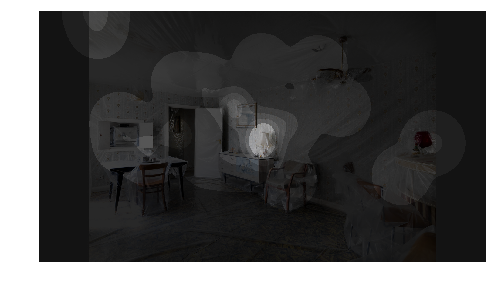

In [28]:
imdir = '../../attention-methodologies/data/CodeCharts/CAT2000_images' # CHANGE THIS 
# by downloading the images from here: http://attent-methods.scripts.mit.edu/datasets/CAT2000_images.zip
with open('CodeCharts_CAT2000.pickle', 'rb') as curfile:  
    CC_data = pickle.load(curfile)
    
visualize_attention(CC_data, plotN=3, plottype=4)

# OSIE: natural images #
Source: https://github.com/NUS-VIP/predicting-human-gaze-beyond-pixels

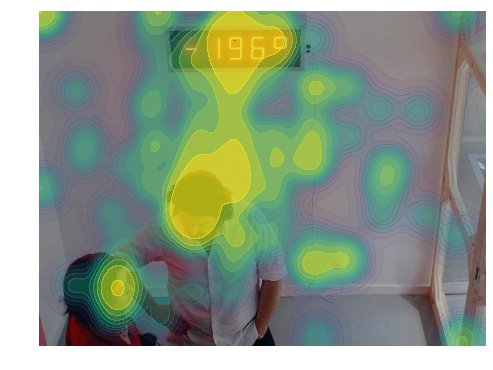

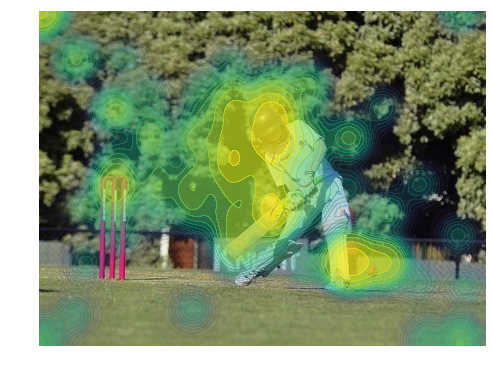

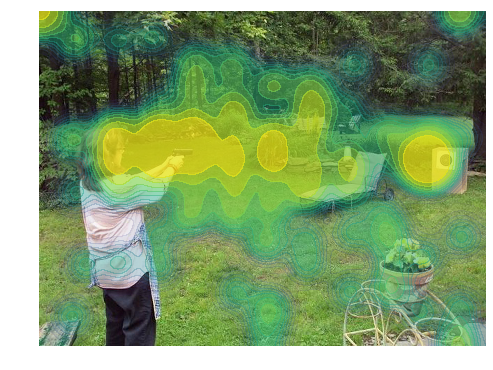

In [30]:
imdir = '../../attention-methodologies/data/CodeCharts/OSIE_images' # CHANGE THIS 
# by downloading the images from here: http://attent-methods.scripts.mit.edu/datasets/CAT2000_images.zip
with open('CodeCharts_OSIE.pickle', 'rb') as curfile:  
    CC_data = pickle.load(curfile)
    
visualize_attention(CC_data, plotN=3, plottype=2)